In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import sparse_categorical_crossentropy

# define the path to your main dataset folder
dataset_path = 'C:/Users/jsunt/Downloads/fungi/Microscopic Fungi Image - DeFungi Dataset'

# specify image dimensions
image_height, image_width = 224, 224  # Adjust as needed

# define batch size
batch_size = 32  # Adjust as needed

# create an ImageDataGenerator for loading and augmenting images
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# load training dataset
train_data = image_generator.flow_from_directory(
    dataset_path + '/train',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=['H1', 'H2', 'H3', 'H5', 'H6']
)

# load validation dataset
valid_data = image_generator.flow_from_directory(
    dataset_path + '/valid',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['H1', 'H2', 'H3', 'H5', 'H6']
)

# load test dataset
test_data = image_generator.flow_from_directory(
    dataset_path + '/test',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # No need to shuffle test data
    classes=['H1', 'H2', 'H3', 'H5', 'H6']
)


Found 4000 images belonging to 5 classes.
Found 178 images belonging to 5 classes.
Found 902 images belonging to 5 classes.


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# load pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# create new model on top
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_data.class_indices), activation='softmax'))

# compile model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(
    train_data,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=valid_data
)

# evaluate model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10



125/125 [==============================] - 44s 329ms/step - loss: 1.1680 - accuracy: 0.5282 - val_loss: 1.1391 - val_accuracy: 0.5674
Epoch 2/10
125/125 [==============================] - 40s 319ms/step - loss: 0.9129 - accuracy: 0.6403 - val_loss: 1.1171 - val_accuracy: 0.5393
Epoch 3/10
125/125 [==============================] - 40s 317ms/step - loss: 0.8286 - accuracy: 0.6762 - val_loss: 1.0406 - val_accuracy: 0.5506
Epoch 4/10
125/125 [==============================] - 40s 317ms/step - loss: 0.7535 - accuracy: 0.6973 - val_loss: 1.0578 - val_accuracy: 0.6011
Epoch 5/10
125/125 [==============================] - 40s 317ms/step - loss: 0.7063 - accuracy: 0.7240 - val_loss: 1.0410 - val_accuracy: 0.5674
Epoch 6/10
125/125 [==============================] - 40s 318ms/step - loss: 0.6751 - accuracy: 0.7370 - val_loss: 1.0953 - val_accuracy: 0.5843
Epoch 7/10
125/125 [==============================] - 40s 317ms/step - loss: 0.6396 - accuracy: 0.7418 - val_loss: 1.0887 - val_accuracy: 0.5

In [8]:
from tensorflow import keras

# Assuming 'model' is the variable containing your trained model
model.save('MODEL', save_format='tf')  # Replace 'your_model' with your desired directory path


INFO:tensorflow:Assets written to: MODEL\assets


INFO:tensorflow:Assets written to: MODEL\assets


In [9]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f'Final Validation Accuracy: {final_val_accuracy * 100:.2f}%')


Final Validation Accuracy: 60.67%


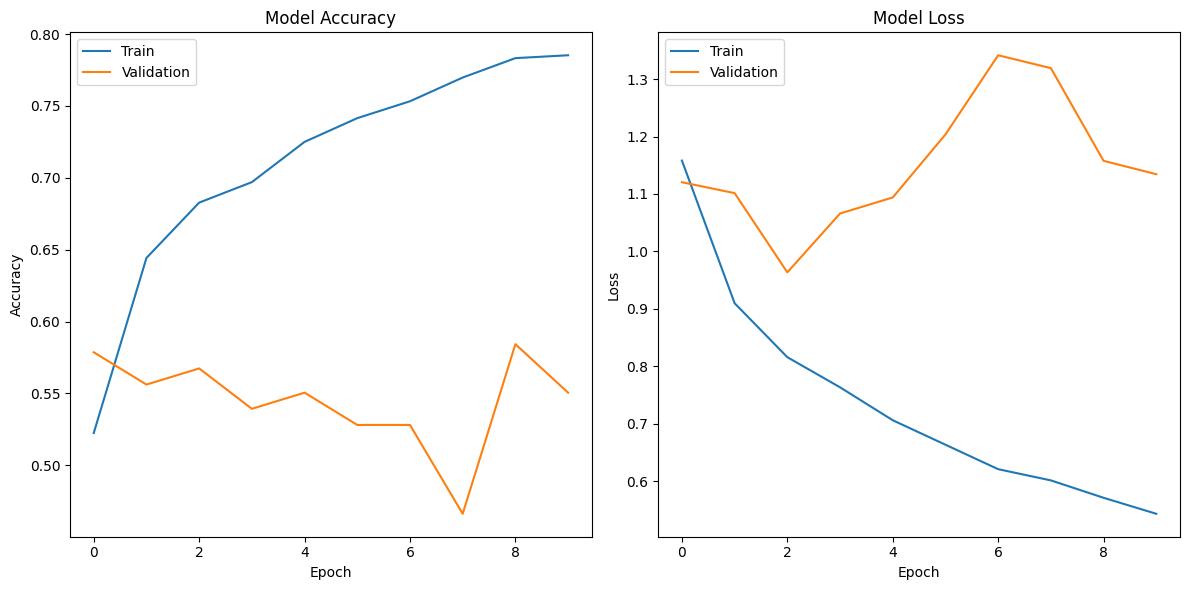

In [5]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [10]:
# Assuming 'history' is the object returned by model.fit()

# Get training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print the final values
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]
final_training_loss = training_loss[-1]
final_validation_loss = validation_loss[-1]

print(f'Final Training Accuracy: {final_training_accuracy * 100:.2f}%')
print(f'Final Validation Accuracy: {final_validation_accuracy * 100:.2f}%')
print(f'Final Training Loss: {final_training_loss:.4f}')
print(f'Final Validation Loss: {final_validation_loss:.4f}')


Final Training Accuracy: 78.55%
Final Validation Accuracy: 60.67%
Final Training Loss: 0.5627
Final Validation Loss: 1.0982


In [9]:
# Assuming 'test_data' is the object returned by image_generator.flow_from_directory for the test dataset

# Evaluate the model on the test dataset
test_loss = model.evaluate(test_data)

# Access the test loss from the result
final_test_loss = test_loss[0]

print(f'Final Test Loss: {final_test_loss:.4f}')

29/29 [==============================] - 10s 327ms/step - loss: 0.8588 - accuracy: 0.6774
Final Test Loss: 0.8588
